In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")

In [6]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [7]:
dete_survey.head(3)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN


In [8]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

The business unit missing a huge chunks of dete_survey. It could be correlated to the time employment of an employee.

In [9]:
tafe_survey.head()
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [10]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In this project, I tried to answer the following question:
1. Are employees who only worked for the institutes for __a short period of time__ resigning due to some kind of __dissatisfaction__? What about employees who have been there __longer__?

2. __Are younger employees resigning due to some kind of dissatisfaction? What about older employees?__

In [11]:
dete_survey.columns[28:49]

Index(['Professional Development', 'Opportunities for promotion',
       'Staff morale', 'Workplace issue', 'Physical environment',
       'Worklife balance', 'Stress and pressure support',
       'Performance of supervisor', 'Peer support', 'Initiative', 'Skills',
       'Coach', 'Career Aspirations', 'Feedback', 'Further PD',
       'Communication', 'My say', 'Information', 'Kept informed',
       'Wellness programs', 'Health & Safety'],
      dtype='object')

In [12]:
dete_survey.columns[0:28]

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above'],
      dtype='object')

In [13]:
tafe_survey.columns[17:66]

Index(['Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate opportunities for personal development',
       'InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%',
       'InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had',
       'InstituteViews. Topic:6. The organisation recognised when staff did good work',
       'InstituteViews. Topic:7. Management was generally supportive of me',
       'InstituteViews. Topic:8. Management was generally supportive of my team',
       'InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me',
       'InstituteViews. Topic:10. Staff morale was positive w

I would like to use some of the columns in both databases for the final analyses, however, their names are a bit different so I'll rename it.
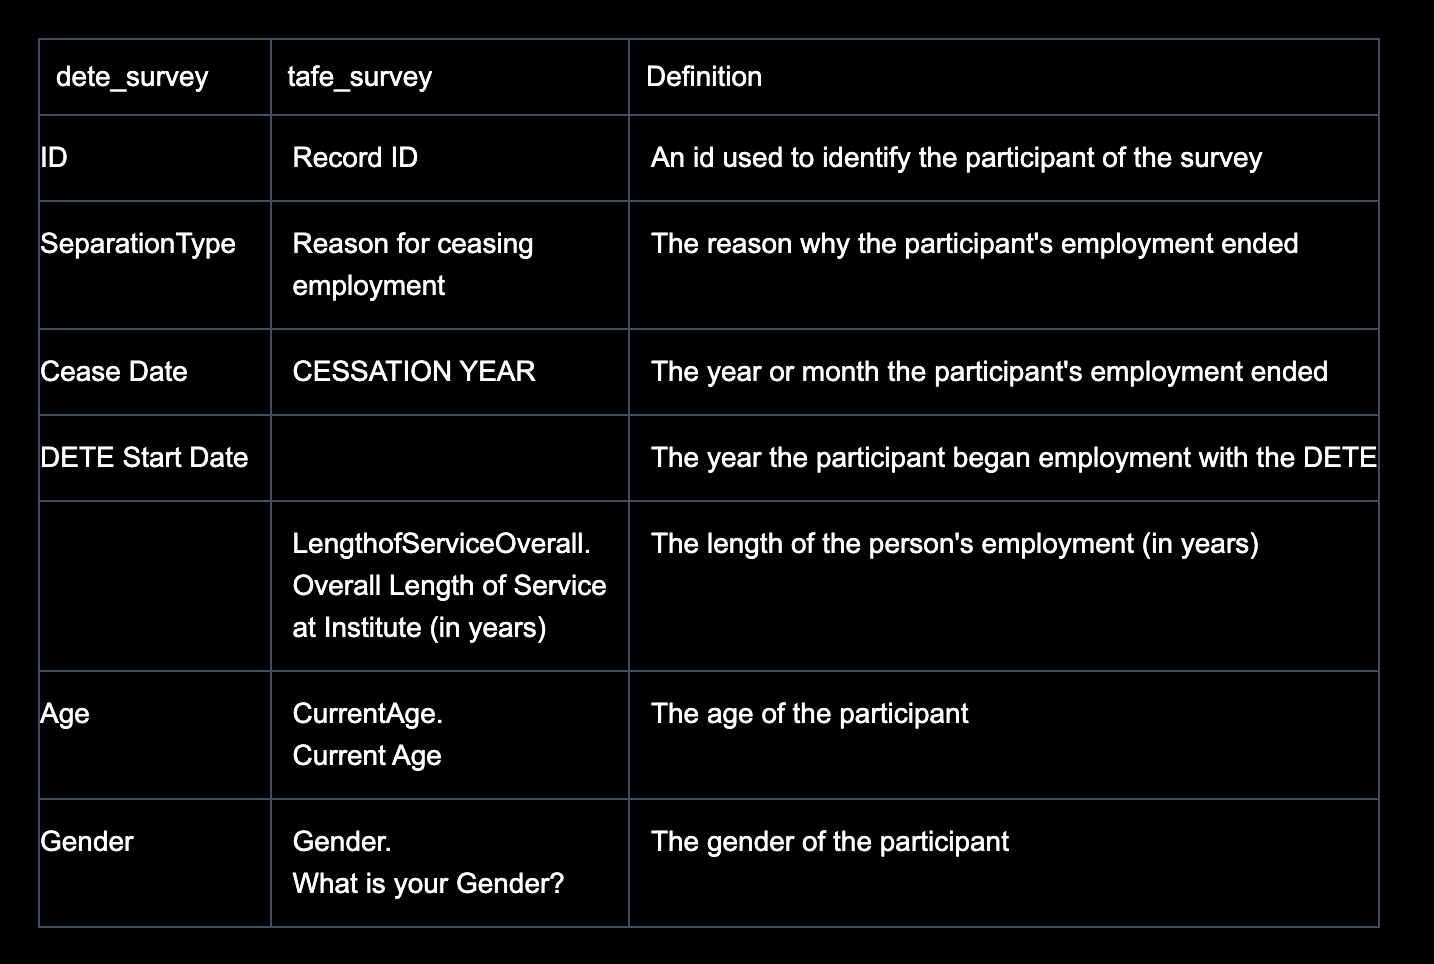

In [14]:
# Rename the columns
dete_survey.columns = dete_survey.columns.str.lower().str.replace(" ", "_").str.strip()

In [15]:
dete_survey.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'professional_development',
       'opportunities_for_promotion', 'staff_morale', 'workplace_issue',
       'physical_environment', 'worklife_balance',
       'stress_and_pressure_support', 'performance_of_supervisor',
       'peer_support', 'initiative', 'skills', 'coach', 'career_aspirations',
       'feedback', 'further_pd', 'communication', 'my_say', 'inform

In [16]:
tafe_survey.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate oppo

In [17]:
new_columns = {'Record ID': 'id',
'CESSATION YEAR':'cease_date',
'Reason for ceasing employment':'separation_type',
'Gender. What is your Gender?':'gender',
'CurrentAge. Current Age':'age',
'Employment Type. Employment Type':'employment_status',
'Classification. Classification':'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)':'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)':'role_service',
'Contributing Factors. Dissatisfaction':'factors_diss',
'Contributing Factors. Job Dissatisfaction':'factors_job_diss'
        }

In [18]:
tafe_survey = tafe_survey.rename(new_columns, axis = 1)
tafe_survey.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separation_type',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family', 'factors_diss',
       'factors_job_diss', 'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate opportunities for personal development',
       'InstituteViews. Topic:4. I was given adequate oppor

In [19]:
# Drop the columns that are not necessary for the analysis
dete_survey_updated= dete_survey.drop(dete_survey.columns[28:49], axis =1)
tafe_survey_updated= tafe_survey.drop(tafe_survey.columns[17:66], axis =1)
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

The end goal is to answer the following question:

Are employees who have only worked for the institutes for a short period of time __resigning__ due to some kind of dissatisfaction? What about employees who have been at the job longer?

So I only analyse survey respondents who resigned, so their separation type contains the string 'Resignation'.

Note that dete_survey_updated dataframe contains multiple separation types with the string 'Resignation':

Resignation-Other reasons
Resignation-Other employer
Resignation-Move overseas/interstate
I'll have to account for each of these variations so we don't unintentionally drop data!

In [20]:
dete_survey_updated.rename({'separationtype': 'separation_type'}, axis=1, inplace=True)

In [21]:
dete_survey_updated.columns

Index(['id', 'separation_type', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [22]:
dete_survey_updated["separation_type"].value_counts(dropna = False)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separation_type, dtype: int64

In [23]:
dete_survey_updated["cease_date"]
# check for the validity of our data. The simplest way would be to check the start and end date

    

0      08/2012
1      08/2012
2      05/2012
3      05/2012
4      05/2012
        ...   
817    02/2014
818    01/2014
819    01/2014
820    12/2013
821    12/2013
Name: cease_date, Length: 822, dtype: object

In [24]:
# filtering out separation due to resignation
dete_survey_updated["separation_type"] = dete_survey_updated["separation_type"].str.split('-').str[0]
dete_resignations = dete_survey_updated.copy()[dete_survey_updated["separation_type"].str.contains(r'Resignation')]

In [25]:
dete_resignations.head(5)

,id,separation_type,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation,05/2012,1994,1997,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation,07/2012,2009,2009,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation,2012,1997,2008,Teacher Aide,NaN,Not Stated,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation,2012,2009,2009,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [26]:
# Extract the years and convert them to a float type
dete_resignations['cease_date'] = dete_survey_updated['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'].isnull()
#There are a few values in dete_resignation is not stated, we need to drop these data


3      False
5      False
8      False
9      False
11     False
       ...  
808    False
815    False
816    False
819    False
821    False
Name: cease_date, Length: 311, dtype: bool

In [27]:
dete_resignations.head(5)

,id,separation_type,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation,2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation,2012,1994,1997,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation,2012,2009,2009,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation,2012,1997,2008,Teacher Aide,NaN,Not Stated,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation,2012,2009,2009,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [28]:
dete_resignations["cease_date"].value_counts()

2013          146
2012          129
2014           22
Not Stated     11
2010            2
2006            1
Name: cease_date, dtype: int64

In [44]:
dete_resignations = dete_resignations[dete_resignations["cease_date"].str.contains("Not Stated")==False]

dete_resignations = dete_resignations[dete_resignations["dete_start_date"].str.contains("Not Stated")==False]

In [38]:
# Check if the "Not stated" rows had been removed
dete_resignations["cease_date"].value_counts()

2013    146
2012    129
2014     22
2010      2
2006      1
Name: cease_date, dtype: int64

In [41]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separation_type'] == 'Resignation'].copy()

In [42]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

## Calculating service time

It is noiticable that the tafe_resignations dataframe already contains a `service` column, which we renamed to institute_service. In order to analyze both surveys together, we'll have to create a corresponding institute_service column in dete_resignations.

In [45]:
dete_resignations['institute_service'] = (dete_resignations['dete_start_date'].astype(float)-dete_resignations['cease_date'].astype(float))*(-1)
dete_resignations['institute_service'].value_counts()

 5.0     23
 1.0     22
 3.0     20
-0.0     20
 6.0     17
 4.0     16
 9.0     14
 2.0     14
 7.0     13
 13.0     8
 8.0      8
 20.0     7
 15.0     7
 10.0     6
 22.0     6
 14.0     6
 17.0     6
 12.0     6
 16.0     5
 18.0     5
 23.0     4
 11.0     4
 24.0     4
 39.0     3
 19.0     3
 21.0     3
 32.0     3
 28.0     2
 26.0     2
 25.0     2
 30.0     2
 36.0     2
 29.0     1
 33.0     1
 42.0     1
 27.0     1
 41.0     1
 35.0     1
 38.0     1
 34.0     1
 49.0     1
 31.0     1
Name: institute_service, dtype: int64

Excluding the null values of the institute_service field from the DETE dataset, we observe that 42% of the employees worked at most 5 years.

In [46]:
tafe_resignations['institute_service'].value_counts(dropna = False)

Less than 1 year      73
1-2                   64
3-4                   63
NaN                   50
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

In [49]:
tafe_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 23 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   340 non-null    float64
 1   Institute                                            340 non-null    object 
 2   WorkArea                                             340 non-null    object 
 3   cease_date                                           335 non-null    float64
 4   separation_type                                      340 non-null    object 
 5   Contributing Factors. Career Move - Public Sector    332 non-null    object 
 6   Contributing Factors. Career Move - Private Sector   332 non-null    object 
 7   Contributing Factors. Career Move - Self-employment  332 non-null    object 
 8   Contributing Factors. Ill Health                     332 non-null    o

## Identification of Dissatisfied Employees
Also, we will work with dete_resignations and tafe_resignations as the dataset has data corresponding to resigned employees only. In dete_resignations, I think the following columns contribute to the employee's decision:

- 13 Job dissatisfaction
- 14 Dissatisfaction with the department
- 15 Physical work environment
- 16 Lack of recognition
- 17 Lack of job security
- 18 Work location
- 19 Employment conditions
- 20 Maternity/family
- 21 Relocation
- 22 Study/Travel
- 23 Ill Health
- 24 Traumatic incident
- 25 Work life balance
- 26 Workload

In [53]:
# we will create a column 'dissatisfied' which will be of Boolean type
# the role of 'any' is to return whether any element is True
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1,skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna = False)

True     137
False    136
Name: dissatisfied, dtype: int64

In [52]:
# similar to the above, but this is with tafe dataframe
tafe_resignations['dissatisfied'] = tafe_resignations[['factors_diss','factors_job_diss']].applymap(update_vals).any(1,skipna=False)
tafe_resignations['dissatisfied'].head()
tafe_resignations_up = tafe_resignations.copy()
tafe_resignations_up['dissatisfied'].value_counts(dropna = False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

## Combining DataFrames
We have performed various actions to clean and filter our data. Now we will be reeady to merge iot. Also, as we practiced in some lessons before, while merging it is better that each dataset has it as own identity. We have given an identity to each dataste by dedicating a column with their title.

In [54]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [55]:
# combining
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)
combined.shape

(613, 53)

In [66]:
# Drop columns with less than 500 non null values
combined_updated = combined.dropna(thresh = 500, axis =1).copy()
combined_updated

,id,separation_type,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
0,4.000000e+00,Resignation,2012,Teacher,Permanent Full-time,Female,36-40,7,False,DETE
1,6.000000e+00,Resignation,2012,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE
2,9.000000e+00,Resignation,2012,Teacher,Permanent Full-time,Female,31-35,3,False,DETE
3,1.000000e+01,Resignation,2012,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE
4,1.200000e+01,Resignation,2012,Teacher,Permanent Full-time,Male,31-35,3,False,DETE
...,...,...,...,...,...,...,...,...,...,...
608,6.350660e+17,Resignation,2013,Operational (OO),Temporary Full-time,Male,21 25,5-6,False,TAFE
609,6.350668e+17,Resignation,2013,Teacher (including LVT),Temporary Full-time,Male,51-55,1-2,False,TAFE
610,6.350677e+17,Resignation,2013,NaN,NaN,NaN,NaN,NaN,False,TAFE
611,6.350704e+17,Resignation,2013,Teacher (including LVT),Permanent Full-time,Female,51-55,5-6,False,TAFE


,id,separation_type,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
0,4.000000e+00,Resignation,2012,Teacher,Permanent Full-time,Female,36-40,7,False,DETE
1,6.000000e+00,Resignation,2012,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE
2,9.000000e+00,Resignation,2012,Teacher,Permanent Full-time,Female,31-35,3,False,DETE
3,1.000000e+01,Resignation,2012,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE
4,1.200000e+01,Resignation,2012,Teacher,Permanent Full-time,Male,31-35,3,False,DETE
...,...,...,...,...,...,...,...,...,...,...
608,6.350660e+17,Resignation,2013,Operational (OO),Temporary Full-time,Male,21 25,5-6,False,TAFE
609,6.350668e+17,Resignation,2013,Teacher (including LVT),Temporary Full-time,Male,51-55,1-2,False,TAFE
610,6.350677e+17,Resignation,2013,NaN,NaN,NaN,NaN,NaN,False,TAFE
611,6.350704e+17,Resignation,2013,Teacher (including LVT),Permanent Full-time,Female,51-55,5-6,False,TAFE


## Classifying Employees by Length of Service
I classified employees according to their duration of work. Below is the classification:

- New: Less than 3 years at a company
- I’m Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In [67]:
# combined['institute_service'].astype('str')
combined_updated['institute_service'].value_counts(dropna = False)

Less than 1 year      73
1-2                   64
3-4                   63
NaN                   50
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
-0.0                  20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
32.0                   3
39.0                   3
21.0                   3
28.0                   2
30.0                   2
26.0                   2
36.0                   2
25.0                   2


In [68]:
# Extract the years of service and convert the type to float
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

In [70]:
# Check the years extracted are correct
combined_updated['institute_service_up'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [71]:
#Next, we'll map each value to one of the career stage definitions.

def transform_service(val):
    if val >= 11:
        return "Veteran"
    elif 7 <= val < 11:
        return "Established"
    elif 3 <= val < 7:
        return "Experienced"
    elif pd.isnull(val):
        return np.nan
    else:
        return "New"

In [72]:
# Updating the new definition
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(transform_service)

In [73]:
# Check
combined_updated['service_cat'].head()

0    Established
1        Veteran
2    Experienced
3        Veteran
4    Experienced
Name: service_cat, dtype: object

## Perform analysis
First some of the data in the dissatisfied columns are missing, it need to be filled in and then aggregated.

Dissatisfied column consists of Boolean values, meaning they're either True or False. Methods such as the df.pivot_table() method actually treat Boolean values as integers, so a True value is considered to be 1 and a False value is considered to be 0. 

That means that the data can be aggregated and calculate the number of people in each group, the percentage of people in each group, etc.

In [74]:
combined_updated['dissatisfied'].value_counts().dropna(inplace=False)

False    377
True     228
Name: dissatisfied, dtype: int64

In [75]:
# Replace missing values with the most frequent value, False
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

In [76]:
dissatisfied_resignations = combined_updated.pivot_table(values='dissatisfied', index = 'service_cat')
dissatisfied_resignations

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


Doing a bivariate analysis between service category and dissatisfied employees, I obsreved that 51.6% of the resignations were from employees with more than 7 years in the institute (51.6% from established employees and 48.5% from veteran employees). With this data, *I can infer that people that work in the DETE and TAFE institute become unmotivated with their jobs probably because of the few challenges they are facing.*

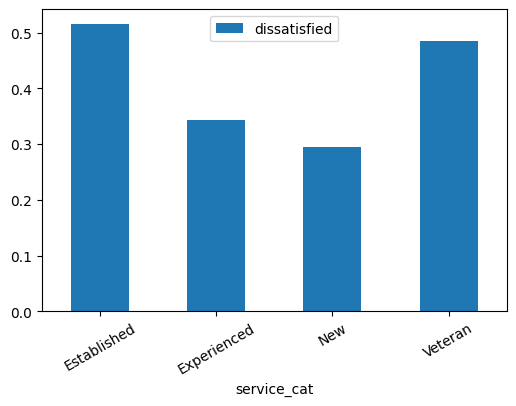

In [77]:
# Calculating the percentage of employees who resigned due to dissatisfaction in each category
dis_pct = combined_updated.pivot_table(index='service_cat', values='dissatisfied')

# Plot the results
%matplotlib inline
dis_pct.plot(kind='bar', rot=30)

## Deeper analysis by incorporating the age column
By dissecting the age column, we can analyze more in-depth the demographic of people that left and to answer the question: __Did more employees in the DETE survey or TAFE survey end their employment because they were dissatisfied in some way?__

In [78]:
combined_updated['age'].value_counts().sort_index()

20 or younger    10
21  25           33
21-25            26
26  30           32
26-30            31
31  35           32
31-35            29
36  40           32
36-40            36
41  45           45
41-45            44
46  50           39
46-50            34
51-55            69
56 or older      29
56-60            22
61 or older      18
Name: age, dtype: int64

In [79]:
combined_updated['age'] = combined_updated['age'].str.replace("  ","-")

def age_cleanup(element):
    if element == "61 or older": return "56 or older"
    elif element == "56-60": return "56 or older"
    else: return element

combined_updated['age'] = combined_updated['age'].map(age_cleanup)

combined_updated['age'].value_counts(dropna=False).sort_index()

20 or younger    10
21-25            59
26-30            63
31-35            61
36-40            68
41-45            89
46-50            73
51-55            69
56 or older      69
NaN              52
Name: age, dtype: int64

In [80]:
# Incorporating the age column into the dissatisfaction dataframe
combined_up_dis = combined_updated.loc[combined_updated['dissatisfied']==True,]

df_Age = combined_updated['age'].value_counts().sort_index().to_frame(name='Total')
df_Age['Dissatisfied'] = combined_up_dis['age'].value_counts().sort_index()
df_Age['Other reasons'] = df_Age['Total'] - df_Age['Dissatisfied']
df_Age['Dissatisfied %'] = round(df_Age['Dissatisfied'] / df_Age['Total'],2)
df_Age['Other reasons %'] = round(df_Age['Other reasons'] / df_Age['Total'],2)
df_Age.index.name = 'Age'                                                           
display(df_Age)

,Total,Dissatisfied,Other reasons,Dissatisfied %,Other reasons %
Age,,,,,
20 or younger,10,2,8,0.20,0.80
21-25,59,17,42,0.29,0.71
26-30,63,26,37,0.41,0.59
31-35,61,23,38,0.38,0.62
36-40,68,24,44,0.35,0.65
41-45,89,35,54,0.39,0.61
46-50,73,29,44,0.40,0.60
51-55,69,29,40,0.42,0.58
56 or older,69,29,40,0.42,0.58


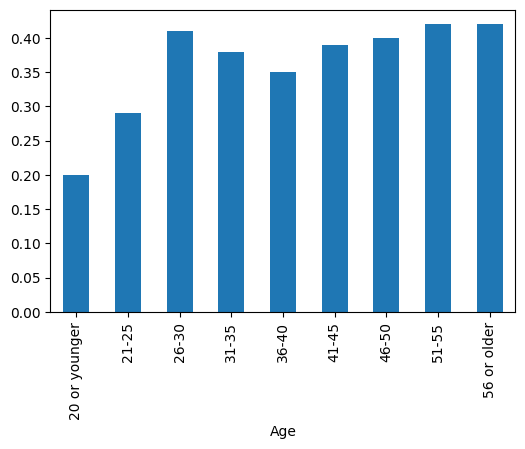

In [82]:
df_Age['Dissatisfied %'].plot(kind='bar')

The dissatisfaction distribution by age also seems to suggest that older people tend to renounce due to dissatisfaction more than younger people. The exception in the 26-30 group of people who also have high percentage of dissatisfied employees